1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


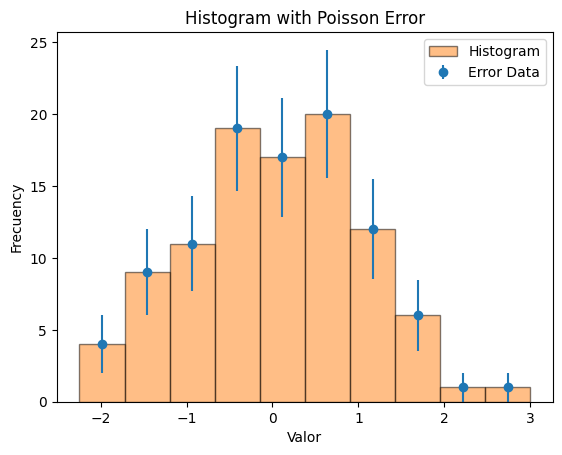

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

N=100
mean=0
std_dev=1
x=np.random.normal(mean,std_dev,N)

bins=10
hist,bins_edge=np.histogram(x,bins=bins) #bin edges= bordes de los intervalos
center_bins= (bins_edge[:-1] + bins_edge[1:])/2
errors=np.sqrt(hist) #Poisson uncertainty

plt.errorbar(center_bins, hist, yerr=errors, fmt='o', label='Error Data')
plt.hist(x, bins=bins, alpha=0.5, label='Histogram',edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuency')
plt.title('Histogram with Poisson Error')
plt.legend()
plt.show()



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

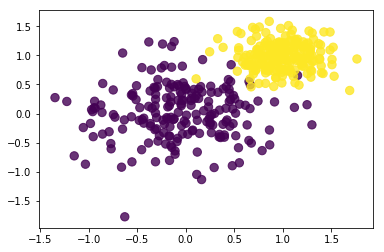

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

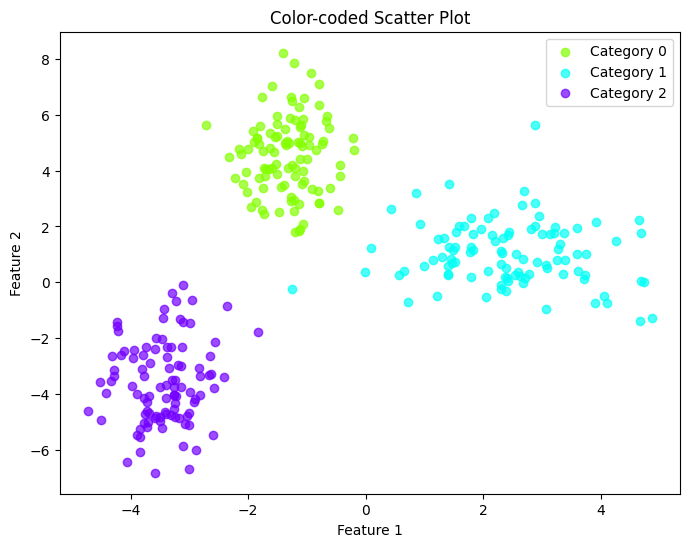

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_gaussian_data(n_samples=100, n_categories=2, random_seed=42):
    
    np.random.seed(random_seed)
    
    means = [np.random.uniform(-5, 5, size=2) for _ in range(n_categories)]  # Medias aleatorias para cada categoría
    stds = [np.random.uniform(0.5, 1.5, size=2) for _ in range(n_categories)]  # Desviaciones estándar aleatorias
    
    X = []
    y = []
    
    for i in range(n_categories):
        data = np.random.normal(loc=means[i], scale=stds[i], size=(n_samples, 2))
        X.append(data)
        y.append(np.full(n_samples, i))  # Etiqueta para la categoría i
    
    return np.vstack(X), np.concatenate(y)

def plot_scatter(X, y):
  
    plt.figure(figsize=(8, 6))
    palette = sns.color_palette("hsv", len(np.unique(y)))  # Paleta de colores para cada categoría
    
    for i, color in zip(np.unique(y), palette):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Category {i}', color=color, alpha=0.7)
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Color-coded Scatter Plot")
    plt.legend()
    plt.show()

# Generar datos y graficar
X, y = generate_gaussian_data(n_samples=100, n_categories=3)
plot_scatter(X, y)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [3]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2025-01-18 17:50:43--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt [following]
--2025-01-18 17:50:43--  https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfbde9df898f5254465f854e86f.dl.dropboxusercontent.com/cd/0/inline/CiZn2XkhzqF0CThXy9UBnqs37Syvqma2q158R5GvogGSTsZ864-qYhwH5mJpKoEvCRBGNz4BV6LdIaHc8QRzaWbkLTUt7rVwGo0VhWs-zQvbnago0YTVRT0wmOIiQC-m_IE/file# [following]
--2025-01-18 17:50:44--  https://ucfbde9df898f5254465f854e86f.dl.dropboxusercontent.com/cd/0/inline/CiZn

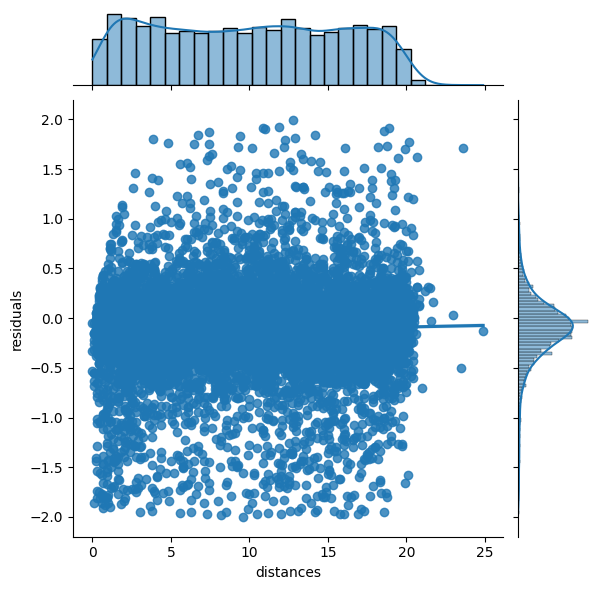

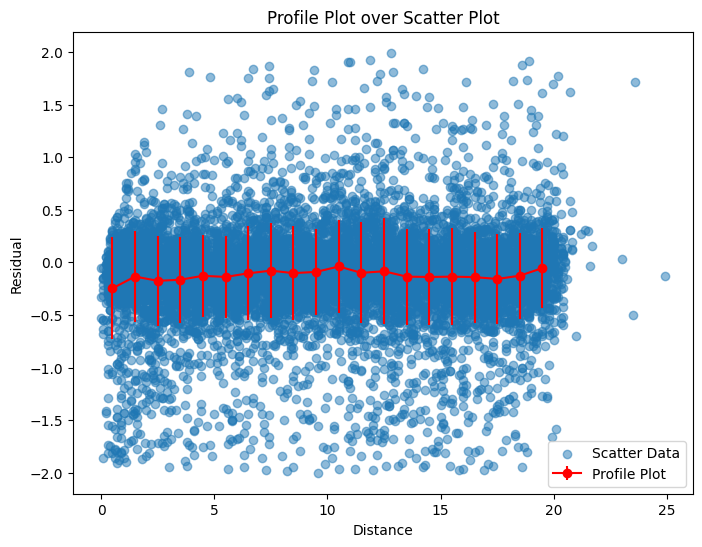

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

file_path = "/mnt/c/Users/macas/Desktop/High level programming/residuals_261.npy"  
data = np.load(file_path, allow_pickle=True).item() 
df = pd.DataFrame(data)

# Filter data|residuals| < 2
df_clean = df[np.abs(df["residuals"]) < 2]

#Linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_clean["distances"], df_clean["residuals"])

sns.jointplot(data=df_clean, x="distances", y="residuals", kind="reg") #graphic
plt.show()

#Statistic parameters
bins = np.linspace(0, 20, 21)  # 20 bins entre 0 y 20
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Centros de los bins

#Mean and statistic deviation of bins
y_means = []
y_stds = []

for i in range(len(bins) - 1):
    mask = (df_clean["distances"] >= bins[i]) & (df_clean["distances"] < bins[i + 1])
    y_means.append(df_clean.loc[mask, "residuals"].mean())
    y_stds.append(df_clean.loc[mask, "residuals"].std())

bin_centers = np.array(bin_centers)
y_means = np.array(y_means)
y_stds = np.array(y_stds)

#Plots
plt.figure(figsize=(8, 6))
plt.scatter(df_clean["distances"], df_clean["residuals"], alpha=0.5, label="Scatter Data")
plt.errorbar(bin_centers, y_means, yerr=y_stds, fmt="o-", color="red", label="Profile Plot")
plt.xlabel("Distance")
plt.ylabel("Residual")
plt.title("Profile Plot over Scatter Plot")
plt.legend()
plt.show()
